<a href="https://colab.research.google.com/github/purvikabajaj/Convolutional-Neural-Networks/blob/master/CNN_Cats_and_Dogs_(Kaggle_Subset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-08-14 14:22:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   317MB/s    in 0.2s    

2020-08-14 14:22:11 (317 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [87]:
import os
import zipfile

In [88]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [89]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [90]:
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

validation_cat_dir = os.path.join(validation_dir, 'cats')
validation_dog_dir = os.path.join(validation_dir, 'dogs')

In [91]:
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

validation_cat_names = os.listdir(validation_cat_dir)
print(validation_cat_names[:10])

validation_dog_names = os.listdir(validation_dog_dir)
print(validation_dog_names[:10])

['cat.742.jpg', 'cat.232.jpg', 'cat.463.jpg', 'cat.239.jpg', 'cat.767.jpg', 'cat.529.jpg', 'cat.543.jpg', 'cat.263.jpg', 'cat.321.jpg', 'cat.644.jpg']
['dog.747.jpg', 'dog.628.jpg', 'dog.845.jpg', 'dog.195.jpg', 'dog.490.jpg', 'dog.309.jpg', 'dog.834.jpg', 'dog.437.jpg', 'dog.549.jpg', 'dog.922.jpg']
['cat.2079.jpg', 'cat.2376.jpg', 'cat.2200.jpg', 'cat.2455.jpg', 'cat.2042.jpg', 'cat.2273.jpg', 'cat.2011.jpg', 'cat.2251.jpg', 'cat.2043.jpg', 'cat.2199.jpg']
['dog.2085.jpg', 'dog.2241.jpg', 'dog.2384.jpg', 'dog.2296.jpg', 'dog.2484.jpg', 'dog.2126.jpg', 'dog.2210.jpg', 'dog.2066.jpg', 'dog.2062.jpg', 'dog.2249.jpg']


In [92]:
print('TRAINING DATA')
train_cat_img = print('No.of images of Cats:', len(os.listdir(train_cat_dir)))
train_dog_img = print('No.of images of Dogs:', len(os.listdir(train_dog_dir)))
print('\nTESTING DATA')
validation_cat_img = print('No.of images of Cats:', len(os.listdir(validation_cat_dir)))
validation_dog_img = print('No.of images of Dogs:', len(os.listdir(validation_dog_dir)))

TRAINING DATA
No.of images of Cats: 1000
No.of images of Dogs: 1000

TESTING DATA
No.of images of Cats: 500
No.of images of Dogs: 500


In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [94]:
train_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary' 
)

Found 2000 images belonging to 2 classes.


In [95]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

(150, 150, 3)


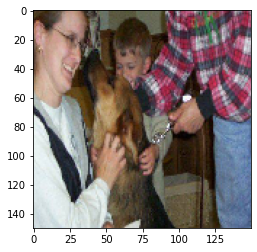

In [96]:
x,y = train_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [97]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


(150, 150, 3)


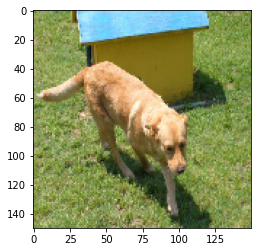

In [98]:
x,y = validation_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [99]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [100]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape = (150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [101]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)       

In [102]:
from tensorflow.keras.optimizers import RMSprop

In [103]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [104]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 10,
    verbose=1,
    validation_data = validation_generator,
    validation_steps = 50
    #callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss')
)

Epoch 1/10
100/100 [==============================] - 8s 82ms/step - loss: 0.7853 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 8s 79ms/step - loss: 0.6929 - accuracy: 0.5005 - val_loss: 0.6900 - val_accuracy: 0.5070
Epoch 3/10
100/100 [==============================] - 8s 79ms/step - loss: 0.6950 - accuracy: 0.5105 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 4/10
100/100 [==============================] - 8s 79ms/step - loss: 0.6882 - accuracy: 0.5365 - val_loss: 0.6788 - val_accuracy: 0.5620
Epoch 5/10
100/100 [==============================] - 8s 79ms/step - loss: 0.6644 - accuracy: 0.5945 - val_loss: 0.6511 - val_accuracy: 0.6390
Epoch 6/10
100/100 [==============================] - 8s 78ms/step - loss: 0.6260 - accuracy: 0.6575 - val_loss: 0.6540 - val_accuracy: 0.6470
Epoch 7/10
100/100 [==============================] - 8s 77ms/step - loss: 0.5766 - accuracy: 0.7040 - val_loss: 0.6245 - val_accuracy: 0.6650

Text(0.5, 1.0, 'TRAINING AND VALIDATION LOSS')

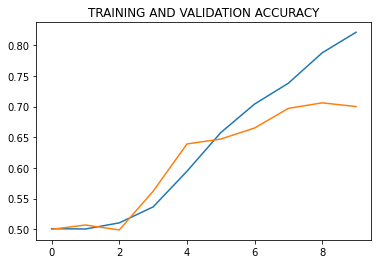

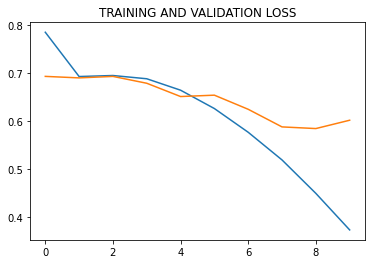

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('TRAINING AND VALIDATION ACCURACY')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs,val_loss)
plt.title('TRAINING AND VALIDATION LOSS')

In [107]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  
  if classes[0]>0.5:
    print('It is a dog')
  else:
    print('It is a cat')

Saving dog.jpg to dog.jpg
[1.]
It is a dog
